# Public Data Collection Exploration - ESA Vegetation Indices

In [1]:
# Sentinel Hub
from sentinelhub import (
    SHConfig, DataCollection, Geometry, BBox, CRS,
    SentinelHubRequest, filter_times, bbox_to_dimensions, MimeType,
    SentinelHubBYOC, ByocCollection, ByocTile, ByocCollectionAdditionalData,
    DownloadFailedException
)

In [2]:
config = SHConfig()
config.sh_base_url = 'https://creodias.sentinel-hub.com'

In [3]:
byoc = DataCollection.define(
        name='Vegetation Indices, Daily',
        api_id='byoc-472c0398-430d-4157-a62d-603363d7a4e8',  #Type
        catalog_id='472c0398-430d-4157-a62d-603363d7a4e8', # collection_id
        service_url='https://creodias.sentinel-hub.com', # End point
        is_timeless=False
    )
byoc

<DataCollection.Vegetation Indices, Daily: DataCollectionDefinition(
  api_id: byoc-472c0398-430d-4157-a62d-603363d7a4e8
  catalog_id: 472c0398-430d-4157-a62d-603363d7a4e8
  service_url: https://creodias.sentinel-hub.com
  is_timeless: False
  has_cloud_coverage: False
)>

In [10]:
from sentinelhub import bbox_to_dimensions

bbox = BBox([-3, 51.4, -2.8, 51.6], crs=CRS.WGS84)
aoi = bbox_to_dimensions( bbox, resolution=100)

evalscript = """
//VERSION=3
function setup() {
  return {
    input: [ { bands: [  "PPI",
                         "NDVI",
                         "FAPAR",
                         "LAI",
                         "QFLAG2" ],
                units: ["DN", "DN", "DN", "DN", "DN" ] 
            }],
    output: { bands: 5, sampleType: SampleType.UINT16  }
  };
}
function evaluatePixel(sample) {
  return [ sample.PPI,
           sample.NDVI,
           sample.FAPAR,
           sample.LAI,
           sample.QFLAG2
           ];
}
"""

byoc_request = SentinelHubRequest(
    evalscript=evalscript,
    input_data=[
        SentinelHubRequest.input_data(
            data_collection=byoc,
            time_interval=('2018-01-01', '2018-01-10'),
        )],
    responses=[
        SentinelHubRequest.output_response('default', MimeType.TIFF)
    ],
    bbox=bbox,
    size=aoi,
    config=config
)

byoc_data = byoc_request.get_data()
byoc_data

[array([[[   22,  2475,  1581,   233,     8],
         [    6,  2231,  1393,   211,  2056],
         [    1,  1327,   974,   147,  6664],
         ...,
         [  421,  6464,  5392,   884,     8],
         [  529,  7057,  6057,  1091,     8],
         [  445,  6052,  4512,   766,  2304]],
 
        [[    0,  1701,  1130,   183,     8],
         [    0,  1289,   928,   160,  2064],
         [    0,   872,   710,   116,  6160],
         ...,
         [  293,  5637,  4516,   691,  2056],
         [  406,  6468,  5406,   896,  2056],
         [  143,  6281,  4262,   741,     8]],
 
        [[    0,  1358,  1011,   160,     8],
         [    0,  1327,   968,   147,  2056],
         [    0,   995,   727,   116,  6160],
         ...,
         [  174,  5389,  3986,   665,  2056],
         [  241,  6923,  5088,   912,     8],
         [   68,  5670,  3673,   657,  2056]],
 
        ...,
 
        [[32768, 64736,     2,     0,     2],
         [    0, 64736,     2,     0,     2],
         [    

In [11]:
from datetime import datetime, timedelta
from sentinelhub import SentinelHubCatalog


# get catalog for collection
catalog = SentinelHubCatalog(
    base_url=byoc.service_url,
    config=config
)


timeframe = '2018-01-01T00:00:00Z', '2018-01-19T00:00:00Z'


# execute search
iterator = catalog.search (
            byoc,
            bbox=bbox,
            time=timeframe,
)

# filter timestamps into +- 1 hour groupings
timestamps = iterator.get_timestamps()
timestamps = filter_times( timestamps, timedelta(hours=1) )
timestamps

C:\Users\crwil\AppData\Roaming\Python\Python39\site-packages\sentinelhub\sh_utils.py:90: SHDeprecationWarning: Parameter base_url is deprecated and will soon be removed. Instead set config.sh_base_url = base_url and provide it with config parameter
  warnings.warn('Parameter base_url is deprecated and will soon be removed. Instead set '


[datetime.datetime(2018, 1, 2, 11, 14, 39, 27000, tzinfo=tzutc()),
 datetime.datetime(2018, 1, 5, 11, 24, 39, 27000, tzinfo=tzutc()),
 datetime.datetime(2018, 1, 7, 11, 14, 31, 26000, tzinfo=tzutc()),
 datetime.datetime(2018, 1, 10, 11, 24, 31, 26000, tzinfo=tzutc()),
 datetime.datetime(2018, 1, 12, 11, 14, 19, 27000, tzinfo=tzutc()),
 datetime.datetime(2018, 1, 15, 11, 24, 19, 27000, tzinfo=tzutc()),
 datetime.datetime(2018, 1, 17, 11, 14, 1, 26000, tzinfo=tzutc())]

### _Repeat analysis using Sentinel-Hub client class_

In [12]:
import os

# define repo name and get root working directory
repo = 'process'
root_path = os.getcwd()[ 0 : os.getcwd().find( repo ) + len ( repo )]
root_path

'C:\\Users\\crwil\\Documents\\GitHub\\sentinelhub\\apis\\process'

In [13]:
# get path to configuration files
cfg_path = os.path.join( root_path, 'cfg' )
cfg_path = os.path.join( cfg_path, 'public' )
cfg_path

'C:\\Users\\crwil\\Documents\\GitHub\\sentinelhub\\apis\\process\\cfg\\public'

In [16]:
# get pathname to configuration file
cfg_file = os.path.join( cfg_path, 'esa-vegetation-index.yml' )

In [17]:
# print contents of configuration file
with open( cfg_file ) as f:
    print ( f.read() )

request:
    evalscript: |
                //VERSION=3
                function setup() {
                    return {
                        input: [ { bands: [  "PPI",
                                             "NDVI",
                                             "FAPAR",
                                             "LAI",
                                             "QFLAG2"
                                          ],
                                units: ["DN", "DN", "DN", "DN", "DN" ] 
                        }],
                        output: { bands: 5, sampleType: SampleType.UINT16  }
                    };
                }
                function evaluatePixel(sample) {
                    return [ sample.PPI,
                            sample.NDVI,
                            sample.FAPAR,
                            sample.LAI,
                            sample.QFLAG2
                    ]
                }  
    inputs:
        - collection: byoc-472c0398-430d-415

In [18]:
import yaml
from munch import munchify

# load cfg file using yaml parser
with open( cfg_file, 'r' ) as f:
    config = munchify( yaml.safe_load( f ) )

In [19]:
from processapi import Client
client = Client( config, base_url='https://creodias.sentinel-hub.com' )

In [32]:
# pick a few dates
from datetime import datetime
timeframe = { 'start' : datetime( 2018, 5, 1, 0, 0, 0 ), 
                'end' : datetime( 2018, 5, 31, 23, 59, 59 ) }


In [33]:
coords = [ -3, 51.0, -2, 52 ]
bbox = Client.getBoundingBox( coords )

resolution=50

In [34]:
# get aoi image dimensions
client.getBoxDimensions( bbox, resolution )

(1373, 2234)

In [35]:
# get S2 acquisitions between start / end dates satisfying filter conditions
timestamps = client.getDatasetTimeStamps ( config.request.inputs[ 0 ], timeframe, bbox=bbox )
timestamps

[datetime.datetime(2018, 5, 2, 11, 6, 19, 27000, tzinfo=tzutc()),
 datetime.datetime(2018, 5, 5, 11, 21, 9, 27000, tzinfo=tzutc()),
 datetime.datetime(2018, 5, 7, 11, 6, 21, 24000, tzinfo=tzutc()),
 datetime.datetime(2018, 5, 10, 11, 21, 21, 24000, tzinfo=tzutc()),
 datetime.datetime(2018, 5, 12, 11, 6, 19, 27000, tzinfo=tzutc()),
 datetime.datetime(2018, 5, 15, 11, 21, 9, 28000, tzinfo=tzutc()),
 datetime.datetime(2018, 5, 17, 11, 6, 21, 24000, tzinfo=tzutc()),
 datetime.datetime(2018, 5, 20, 11, 21, 21, 24000, tzinfo=tzutc()),
 datetime.datetime(2018, 5, 22, 11, 10, 49, 28000, tzinfo=tzutc()),
 datetime.datetime(2018, 5, 25, 11, 21, 9, 24000, tzinfo=tzutc()),
 datetime.datetime(2018, 5, 27, 11, 6, 51, 24000, tzinfo=tzutc()),
 datetime.datetime(2018, 5, 30, 11, 21, 21, 24000, tzinfo=tzutc())]

In [36]:
# get time series
response = client.getTimeSeries ( timeframe, resolution, bbox=bbox  )
response._df

,default,time
0,"[[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, ...",2018-05-02 11:06:19.027000+00:00
1,"[[[5906, 6379, 5422, 2083, 1], [11506, 8131, 7...",2018-05-05 11:21:09.027000+00:00
2,"[[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, ...",2018-05-07 11:06:21.024000+00:00
3,"[[[716, 5719, 3326, 1160, 1], [2117, 8087, 532...",2018-05-10 11:21:21.024000+00:00
4,"[[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, ...",2018-05-12 11:06:19.027000+00:00
5,"[[[8609, 6703, 5932, 2587, 1], [18234, 8797, 8...",2018-05-15 11:21:09.028000+00:00
6,"[[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, ...",2018-05-17 11:06:21.024000+00:00
7,"[[[22343, 5746, 4920, 2205, 32], [15123, 6107,...",2018-05-20 11:21:21.024000+00:00
8,"[[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, ...",2018-05-22 11:10:49.028000+00:00
9,"[[[0, 133, 3091, 32768, 4], [0, 146, 3093, 327...",2018-05-25 11:21:09.024000+00:00


### _Visualise land cover classification output_

In [37]:
response._df.iloc[ 0 ][ 'default' ][ :, :, 0 ]

array([[    0,     0,     0, ...,     0,     0,     0],
       [    0,     0,     0, ...,     0,     0,     0],
       [    0,     0,     0, ...,     0,     0,     0],
       ...,
       [28511, 11961,  5472, ...,  5514, 16996, 17318],
       [29694, 25579, 15229, ..., 16793, 22171, 15906],
       [30000, 25329,  7147, ...,  6270, 10196, 15378]], dtype=uint16)

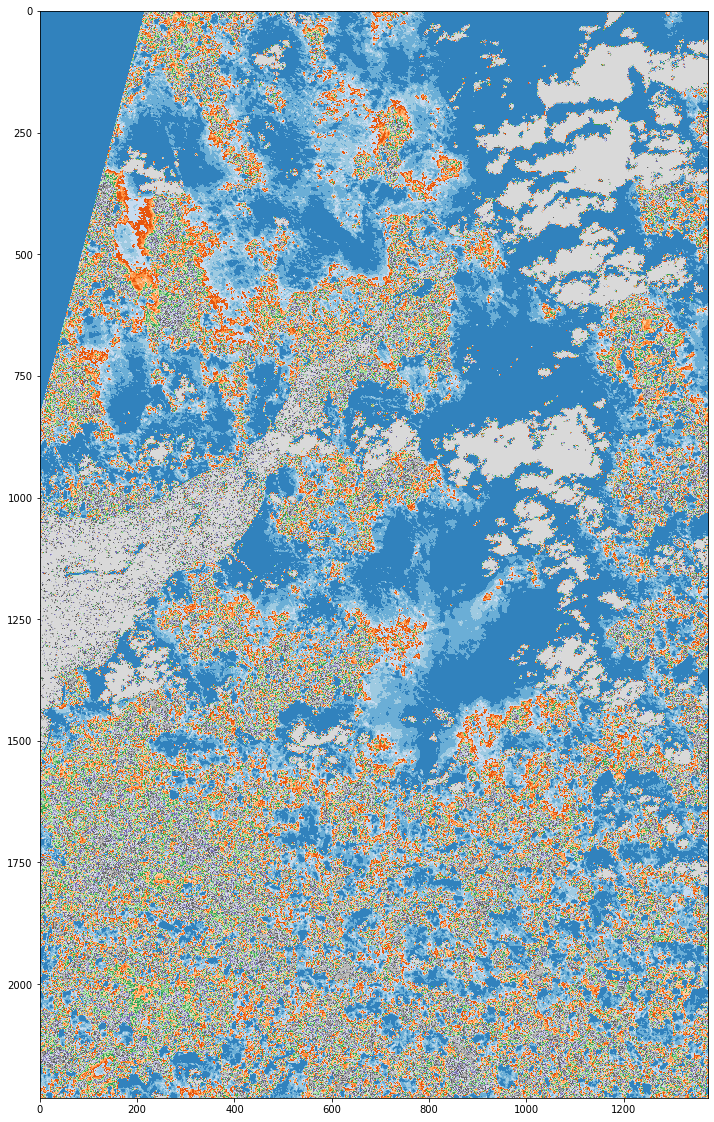

In [38]:
import matplotlib.pyplot as plt 

fig,ax = plt.subplots( figsize=(20,20))
ax.imshow( response._df.iloc[ 0 ][ 'default' ][ :, :, 0 ], cmap='tab20c' )

### _Create binary mask mapping forest land cover classes_

In [40]:
 response._df.iloc[ 0 ][ 'default' ][ :, :, 4 ] 

array([[   0,    0,    0, ...,    4,    4,    4],
       [   0,    0,    0, ...,    4,    4,    4],
       [   0,    0,    0, ...,    4,    4,    4],
       ...,
       [4097, 4097, 4097, ...,    1,    1,    1],
       [4097, 4097, 4097, ...,    1,    1,    1],
       [4097, 4097, 4097, ...,    1,    1,    1]], dtype=uint16)

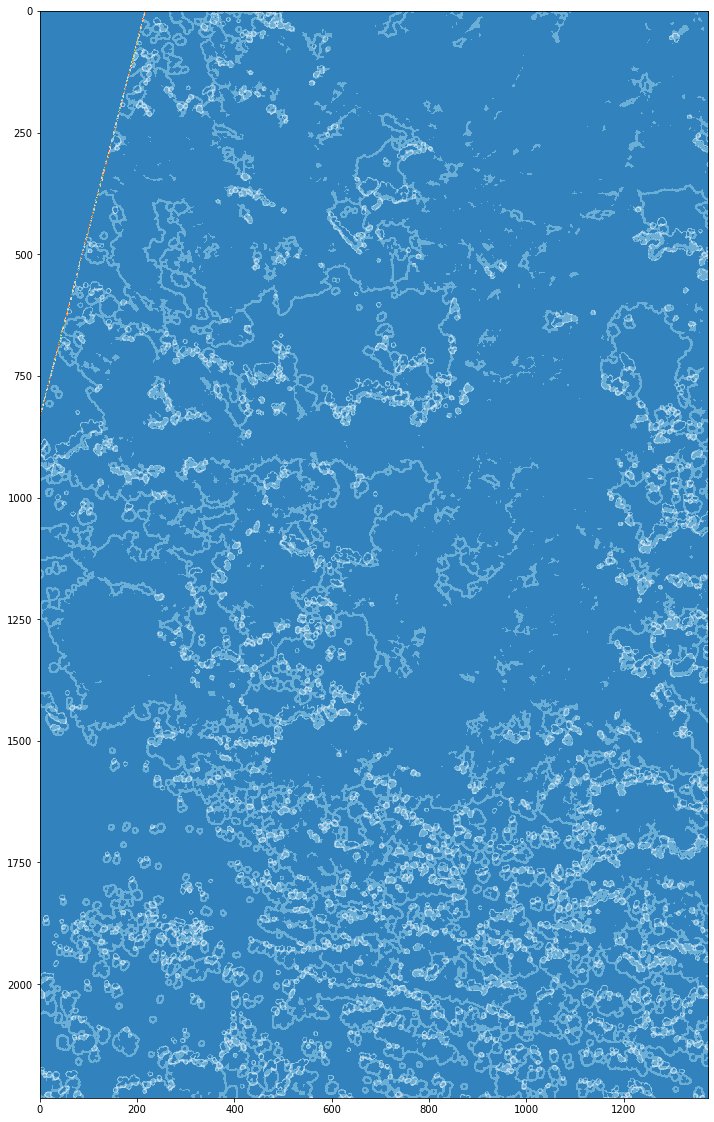

In [39]:
fig,ax = plt.subplots( figsize=(20,20))
ax.imshow( response._df.iloc[ 0 ][ 'default' ][ :, :, 4 ], cmap='tab20c' )

In [69]:
import numpy as np
a = ( ( np.array ( response._df.iloc[ 0 ][ 'default' ][ :, :, 4 ] & 0x04, dtype=bool ) ) | 
    ( np.array ( response._df.iloc[ 0 ][ 'default' ][ :, :, 4 ] & 0x08, dtype=bool ) ) |
    ( np.array ( response._df.iloc[ 0 ][ 'default' ][ :, :, 4 ] & 0x16, dtype=bool ) ) )

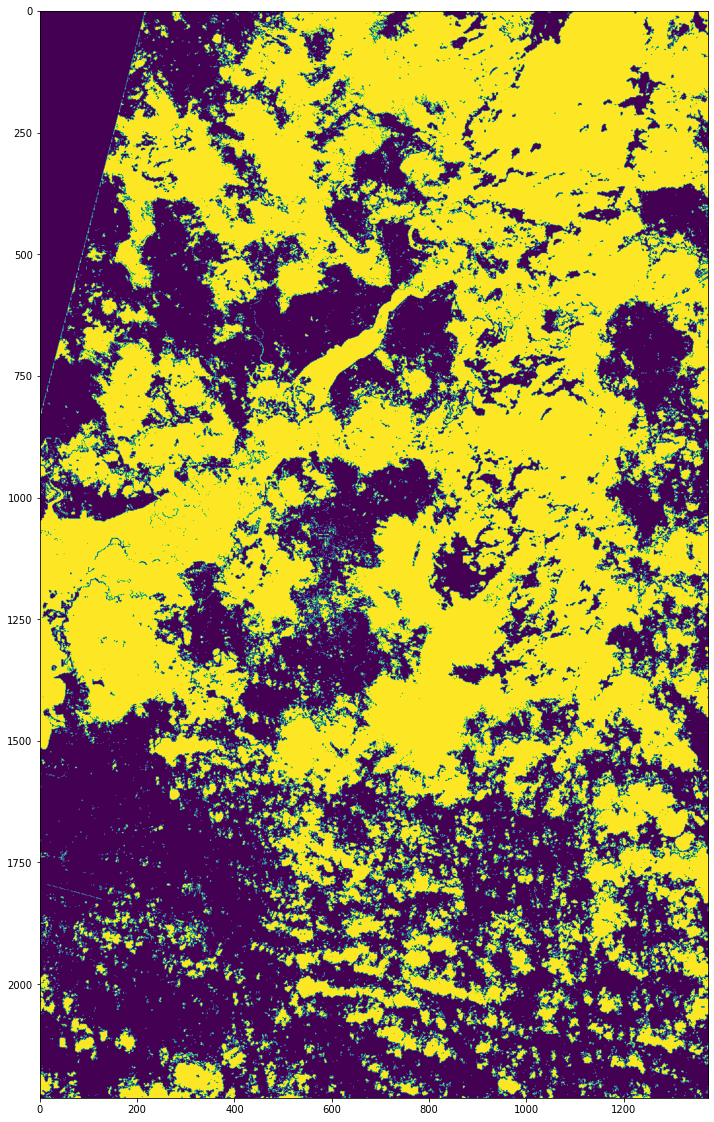

In [70]:
fig,ax = plt.subplots( figsize=(20,20))
ax.imshow( a )


